---
format:
  html:
    toc: false
    page-layout: full
execute:
    #echo: True
---

#**1. Project Background**

The liquor industry plays a significant role in the regional economy. As reported by the Distilled Spirits Council of the United States, the market share of liquor revenue has steadily increased, rising from 28.7% in 2000 to 42.1% in 2022, surpassing beer for the first time ever (Distilled Spirits Council of the United States, 2023). Des Moines, one of the major cities in State Iowa, has a dynamic and evolving liquor market. According to State of Iowa, the liquors sales in Des Maine shows an upward trend since 2012(State of Iowa 2023). Understanding the intricacies of liquor sales is crucial for businesses aiming to thrive in this sector. The focus of this project was to aid small business owners aiming to establish liquor stores in Iowa. By examining the liquor sales dataset from 2012 to 2016 provided by the State of Iowa, the project aimed to recommend ideal locations and product categories for these new businesses in Des Moines.


---



#**2.Import relevant packages and dataset**

In [ ]:
from google.colab import drive  #I put this code into a Python file called Google_Connection and copied it to my Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import string
import seaborn as sns
import altair as alt
import scipy.stats as stats
pd.set_option('display.max_columns', 10, 'display.max_rows', 10,'display.float_format', lambda x: '%.2f' %x)

### **Convert to html**

In [ ]:
#| echo: false
#| code-fold: true

!jupyter nbconvert "/content/sales.ipynb" --to html

[NbConvertApp] Converting notebook /content/sales.ipynb to html
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/widgetsdatatypefilter.py:71: UserWarning: Your element with mimetype(s) dict_keys([]) is not able to be represented.
  warn(
[NbConvertApp] Writing 2409960 bytes to /content/sales.html


### **Import dataset**

In [ ]:
#| echo: false
#| code-fold: true

df = pd.read_csv('/content/drive/MyDrive/MSSP6070/Assignments/A4/Iowa_Liquor_Sales.csv')

<ipython-input-3-262929b3f157>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/MSSP6070/Assignments/A4/Iowa_Liquor_Sales.csv')


In [ ]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,...,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,...,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,...,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,...,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,...,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,...,$9.60,2,$19.20,0.30,0.08


This report uses the liquor sales database recording the sales data from 2012 to 2016 published by the State of Iowa. Since 2012, the State of Iowa regularly releases detailed data on liquor sales, with over 20 million transaction records available. This extensive dataset is a valuable resource for analyzing trends in liquor consumption.

---



# **3.Data cleaning and overview**

# **3.1 Data overview**

In [ ]:
#| echo: false
#| code-fold: true

#Narrow the dataset to Des Moines
df2 = df[df['City'] == 'DES MOINES']

In [ ]:
#Data Overview
print(df2.columns)
print(df2.dtypes)

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')
Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
                          ...   
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
Length: 24, dtype: object


In [ ]:
#| echo: true
#| code-fold: true

# Replacing the dollar symbol in the sales column by None
df2['Sale (Dollars)'] = df2['Sale (Dollars)'].str.replace('$', '')
df2['Sale (Dollars)'] = df2['Sale (Dollars)'].astype('float')
df2['State Bottle Cost'] = df2['State Bottle Cost'].str.replace('$', '')
df2['State Bottle Cost'] = df2['State Bottle Cost'].astype('float')
df2['State Bottle Retail'] = df2['State Bottle Retail'].str.replace('$', '')
df2['State Bottle Retail'] = df2['State Bottle Retail'].astype('float')
#Change to time series data
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Year'] = df2['Date'].dt.year

<ipython-input-92-ab9f1023d61b>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Sale (Dollars)'] = df2['Sale (Dollars)'].str.replace('$', '')
<ipython-input-92-ab9f1023d61b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sale (Dollars)'] = df2['Sale (Dollars)'].str.replace('$', '')
<ipython-input-92-ab9f1023d61b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [ ]:
#| echo: true
#| code-fold: true

#Remove empty values
df_cleaned = df2.dropna()

In [ ]:
#| echo: true
#| code-fold: true
#Change datatype and variable names
df_cleaned['Store Number'] = df_cleaned['Store Number'].astype('object')
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Salesamount']=df_cleaned['Sale (Dollars)']
df_cleaned['BottlesSold']=df_cleaned['Bottles Sold']
df_cleaned['StateBottleCost']=df_cleaned['State Bottle Cost']
df_cleaned['VolumeSoldGallons']=df_cleaned['Volume Sold (Gallons)']
df_cleaned['Categoryname']=df_cleaned['Category Name']
df_cleaned = df_cleaned.drop(columns=['Sale (Dollars)','Bottles Sold','Volume Sold (Gallons)','State Bottle Cost'])
df_cleaned['Categoryname'] = df_cleaned['Categoryname'].astype(str)

<ipython-input-9-61e3f10747d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Store Number'] = df_cleaned['Store Number'].astype('object')
<ipython-input-9-61e3f10747d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
<ipython-input-9-61e3f10747d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

## **Data Pattern**

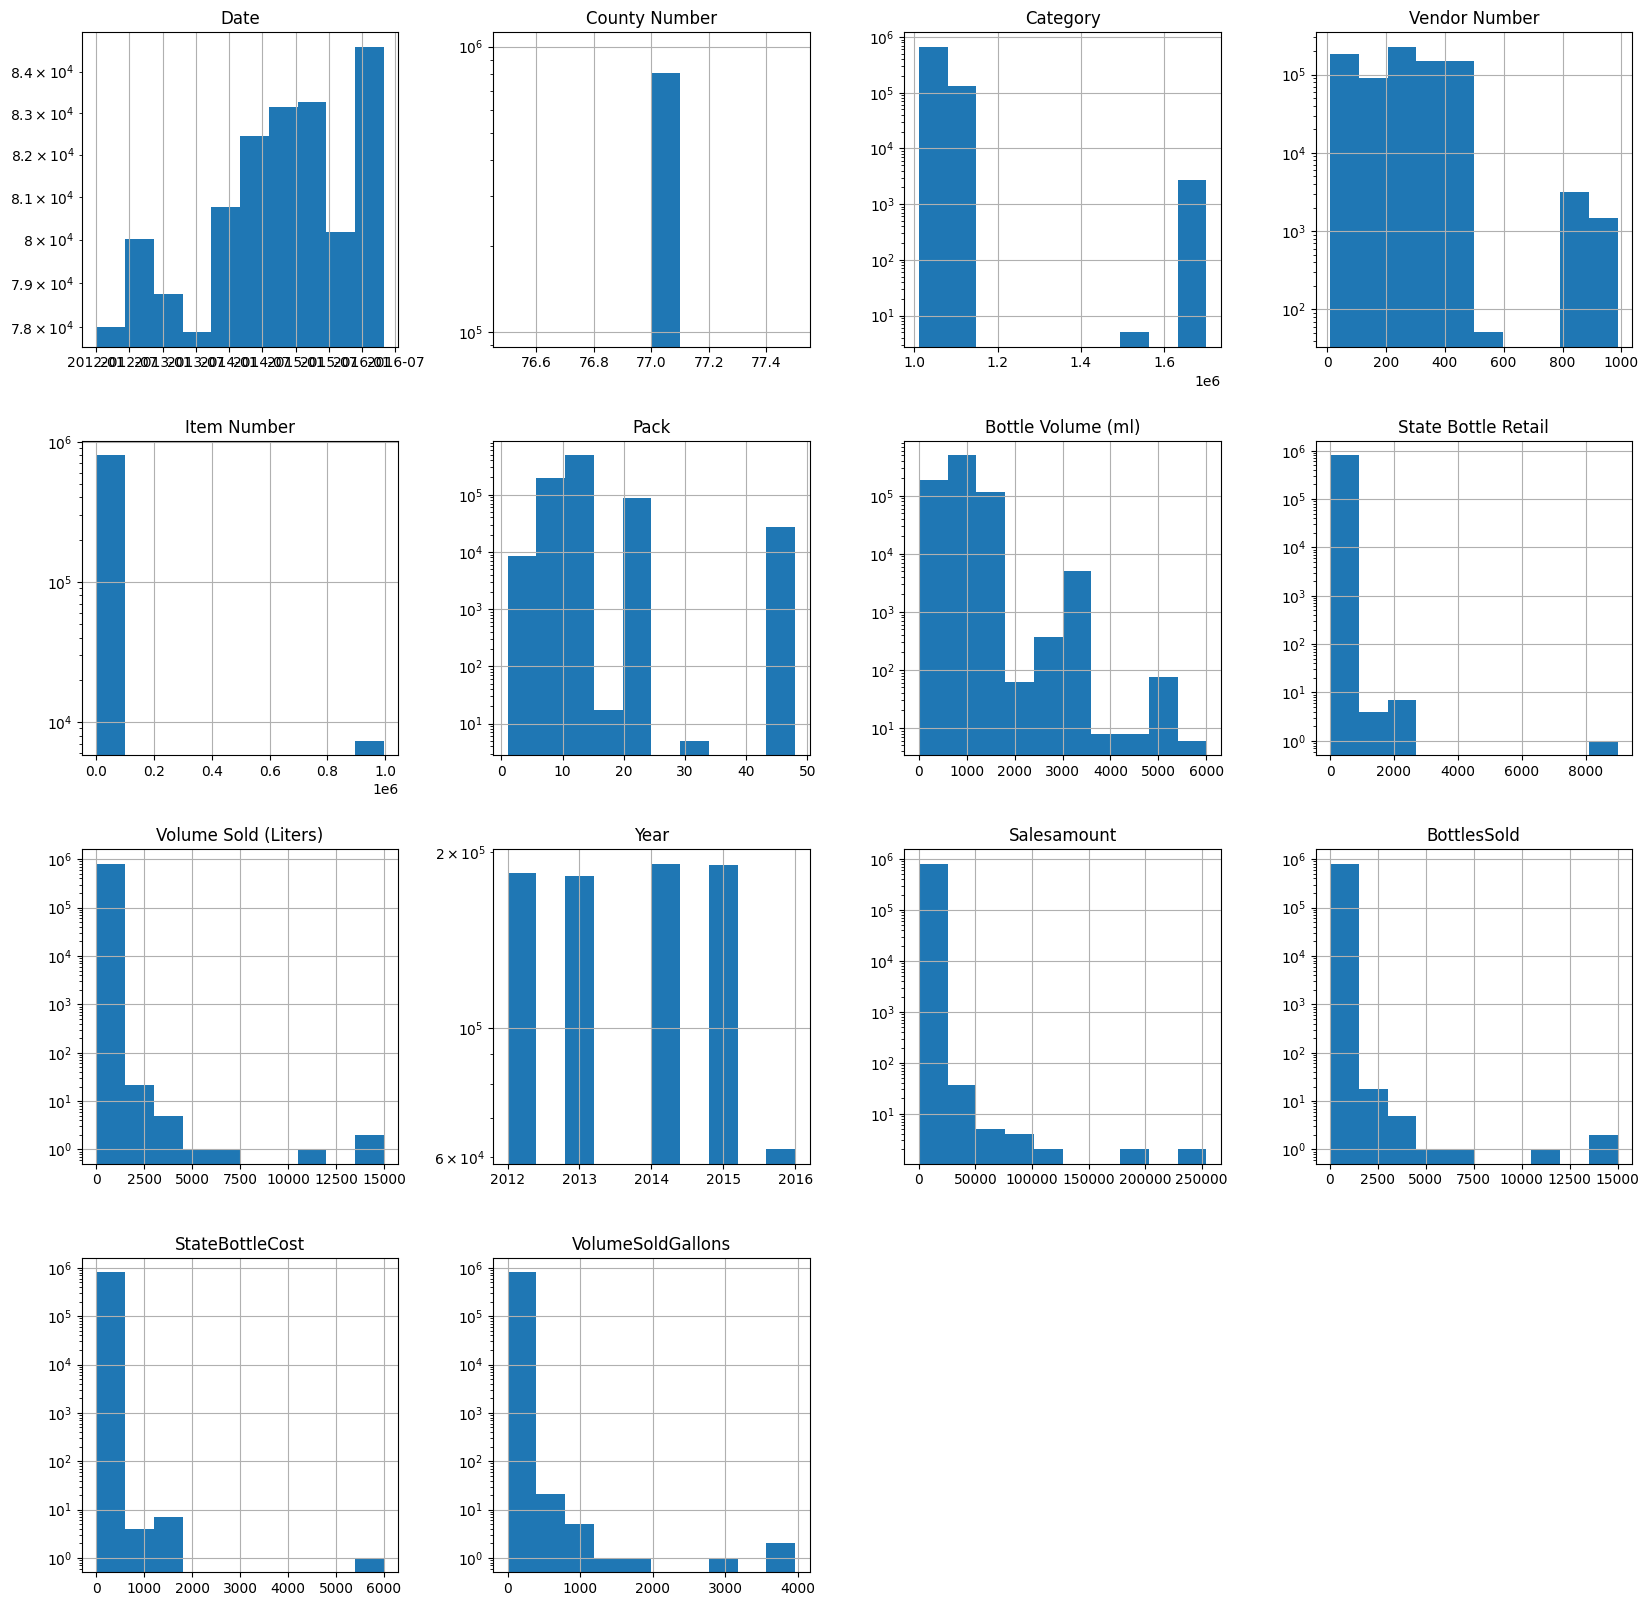

In [ ]:
# Plot histograms for all variables
ax = df_cleaned.hist(figsize=(20, 20))
# Setting y-scale to log for each subplot
for axis in ax.flatten():
    axis.set_yscale('log')
plt.show()

As is shown in the graphs, the variables considered are not normally distributed. Primarily, the ‘State bottle retail’ data indicates that most bottles are priced below 500 dollars. However, a distinct segment exists for luxury products, with some bottles priced over 8,000 dollars. Analyzing key categories such as bottles sold, volumes sold, and sales amount reveals that most transactions are below 25,000 dollars. Its also observed that typical purchases involve fewer than 1,000 bottles per transaction. Nevertheless, the data shows exceptions where some transactions involve the purchase of more than 12,500 bottles, highlighting a diverse range of buying behaviors. The high standard deviation of the ‘Sales amount’ variable also suggests the wide range of buying behaviors among consumers.

## **Correlation Mapping**

<ipython-input-10-cc050c2ed205>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cleaned.corr()


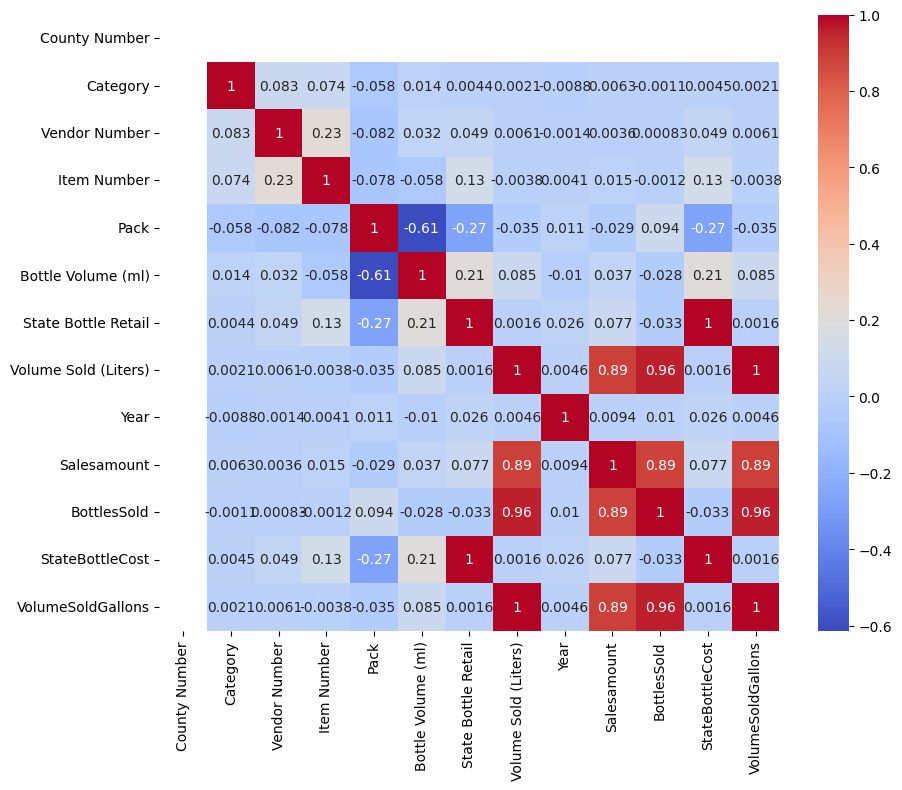

In [ ]:
#Correlation Analysis
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 8))  # Size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation matrix also helps us understand the values and their relationships. For example, the sales amount has strong relationship with the number of bottles sold and volumes sold.

# **3.2 Handling outliers**

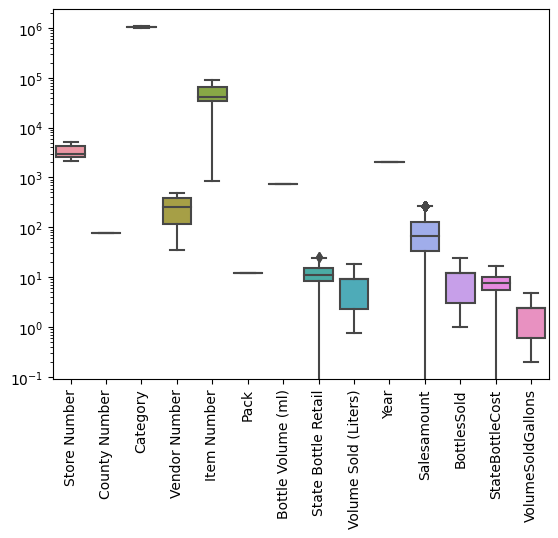

In [ ]:
#identify outliers
# Create boxplots for all features and label
sns.boxplot(data=df_cleaned).set_yscale('log')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#| echo: true
#| code-fold: true
# Select only numerical columns
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate IQR for each feature
q1 = df_cleaned[num_cols].quantile(0.25)
q3 = df_cleaned[num_cols].quantile(0.75)
iqr = q3 - q1

# Define upper and lower limits for outliers
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr


# Filter out the outliers from each column
for col in num_cols:
    df_cleaned = df_cleaned[(df_cleaned[col] <= upper_limit[col]) & (df_cleaned[col] >= lower_limit[col])]

In [ ]:
#| echo: true
#| code-fold: true
#standarize features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
normalized_columns = scaler.fit_transform(numerical_columns)
normalized_df = pd.DataFrame(normalized_columns, columns=numerical_columns.columns)
normalized_df.reset_index(inplace=True)

In [ ]:
#| echo: true
#| code-fold: true
# Select non-numerical columns
non_numerical_columns = df_cleaned.select_dtypes(exclude=['float64', 'int64'])
non_numerical_columns.reset_index(drop=True,inplace=True)
non_numerical_columns=non_numerical_columns
non_numerical_columns.reset_index(inplace=True)

In [ ]:
#| echo: true
#| code-fold: true
# Merge based on the 'Index' column
dfstand = pd.merge(normalized_df, non_numerical_columns, on='index', how='inner')

In [ ]:
#| echo: true
#| code-fold: true
#for random forest
dffinal=dfstand

In [ ]:
#Find median values for each variable
print(df_cleaned.describe())

       County Number   Category  Vendor Number  Item Number      Pack  ...  \
count      416133.00  416133.00      416133.00    416133.00 416133.00  ...   
mean           77.00 1042673.26         256.06     46126.27     12.00  ...   
std             0.00   24648.74         138.51     22255.18      0.00  ...   
min            77.00 1011100.00          35.00       832.00     12.00  ...   
25%            77.00 1022100.00         115.00     34014.00     12.00  ...   
50%            77.00 1032200.00         260.00     41701.00     12.00  ...   
75%            77.00 1062300.00         380.00     64862.00     12.00  ...   
max            77.00 1101100.00         492.00     89952.00     12.00  ...   

           Year  Salesamount  BottlesSold  StateBottleCost  VolumeSoldGallons  
count 416133.00    416133.00    416133.00        416133.00          416133.00  
mean    2013.67        94.78         7.93             8.45               1.62  
std        1.25        76.88         5.26             3.9

In [ ]:
# Checknig the types of columns
df_cleaned.dtypes

Invoice/Item Number            object
Date                   datetime64[ns]
Store Number                   object
Store Name                     object
Address                        object
                            ...      
Salesamount                   float64
BottlesSold                     int64
StateBottleCost               float64
VolumeSoldGallons             float64
Categoryname                   object
Length: 26, dtype: object

In [ ]:
#| echo: true
#| code-fold: true
dfstand.drop('index', axis=1, inplace=True)



---



#**4.Exploratory analysis**

# **4.1 Popular Vendor**

In [ ]:
#| echo: true
#| code-fold: true
#Find vendors with highest salesamount， TOP10
df_sales = df_cleaned[['Vendor Number', 'Salesamount','Vendor Name']]
df_sales = df_sales.groupby(['Vendor Number','Vendor Name'])['Salesamount'].sum().reset_index()
df_sales_sorted = df_sales.sort_values(by='Salesamount', ascending=False)
dfsales10=df_sales_sorted.head(10)

In [ ]:
dfsales10

,Vendor Number,Vendor Name,Salesamount
26,260.00,Diageo Americas,8311110.61
2,65.00,Jim Beam Brands,4030404.65
46,370.00,Pernod Ricard USA/Austin Nichols,2907381.24
58,434.00,Luxco-St Louis,2760108.54
0,35.00,"Bacardi U.S.A., Inc.",2633445.48
3,85.00,Brown-Forman Corporation,2058552.89
57,421.00,"Sazerac Co., Inc.",1964420.40
52,395.00,Proximo,1903483.23
8,115.00,"Constellation Wine Company, Inc.",1696692.61
48,380.00,Phillips Beverage Company,1360471.55


In [ ]:
#| echo: true
#| code-fold: true
#Data visulization
!pip install holoviews
!pip install hvplot
import holoviews as hv
import hvplot.pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.7 MB/s eta 0:00:00


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
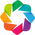

:Bars   [Vendor Name]   (Salesamount)

In [ ]:
# Data Visualization
hv.extension("bokeh")
bar_chart = dfsales10.hvplot(kind='barh', x='Vendor Name', y='Salesamount', width=1000, figsize=(10, 20))
bar_chart

The top 10 alcoholic beverage vendors by sales in Des Moines are Diageo Americas, Jim Beam Brands, Pernod Richard USA, Luxco-St Louis, Sazerac, and others.



# **4.2 Popular alcoholic product analysis**

## **Data cleaning**

In [ ]:
#| echo: true
#| code-fold: true
#createvodkagin
df_cleaned['Categorynew'] = df_cleaned['Categoryname'].str.split()

def categorize_description(Categorynew):
    if 'GINS' in Categorynew:
        return 1
    elif 'SCHNAPPS' in Categorynew:
        return 1
    elif 'TEQUILA' in Categorynew:
        return 2
    elif 'RUM' in Categorynew:
        return 3
    elif 'WHISKEY' in Categorynew:
        return 4
    elif 'WHISKIES' in Categorynew:
        return 4
    elif 'VODKA' in Categorynew:
        return 5
    elif 'VODKAS' in Categorynew:
        return 5
    elif 'BRANDIES' in Categorynew:
        return 6
    elif 'LIQUEURS' in Categorynew:
        return 7
    else:
        return 0  # or another value to signify no match

df_cleaned['Categorytype'] = df_cleaned['Categorynew'].apply(categorize_description)

In [ ]:
#| echo: true
#| code-fold: true
df_cleaned
conditions = [
    df_cleaned['Categorytype'] == 0,
    df_cleaned['Categorytype'] == 1,
    df_cleaned['Categorytype'] == 2,
    df_cleaned['Categorytype'] == 3,
    df_cleaned['Categorytype'] == 4,
    df_cleaned['Categorytype'] == 5,
    df_cleaned['Categorytype'] == 6,
    df_cleaned['Categorytype'] == 7,
]
choices = ['OTHERS', 'GINS', 'TEQUILA','RUM','WHISKEY','VODKA','BRANDIES','LIQUEURS']
df_cleaned['categorytype'] = np.select(conditions, choices, default='other_value')

In [ ]:
#| echo: true
#| code-fold: true
#Popular drink
df_sales = df_cleaned[['categorytype', 'Salesamount','Date']]
#df_sales['Year'] = df_sales['Date'].dt.year

#Add date parts to the dataframe for future use in the analysis
df_sales = df_sales.assign(orderyear = df_sales['Date'].dt.year)
df_sales = df_sales.assign(orderquarter = df_sales['Date'].dt.quarter)
df_sales = df_sales.assign(ordermonth = df_sales['Date'].dt.month)
df_sales = df_sales.assign(orderday = df_sales['Date'].dt.day)
df_sales = df_sales.assign(daynumber = df_sales['orderyear']+df_sales['ordermonth']+df_sales['orderday'])

#Determine quarterly sales.  Notice 2010 and 2014 are incomplete years.
df_sales=df_sales.groupby(['orderyear','orderquarter','categorytype']).agg({'Salesamount':'sum'}).reset_index()

In [ ]:
#| echo: true
#| code-fold: true
# Resetting index and creating a pivot table
pivot_df = df_sales.pivot(index=['orderyear', 'orderquarter'], columns='categorytype', values='Salesamount')
#Remove 2016 Q2 due to insufficient data
pivot_df = pivot_df.iloc[:-1]

In [ ]:
#| echo: true
#| code-fold: true
import altair as alt
import pandas as pd

# Assuming melted_df is your melted DataFrame
# Melt the DataFrame for Altair
melted_df = pivot_df.reset_index().melt(id_vars=['orderyear', 'orderquarter'], var_name='categorytype', value_name='Salesamount')
# Create a calculated field for the x-axis labels
melted_df['year_quarter'] = melted_df['orderyear'].astype(str) + ' Q' + melted_df['orderquarter'].astype(str)
melted_df

,orderyear,orderquarter,categorytype,Salesamount,year_quarter
0,2012,1,BRANDIES,122351.31,2012 Q1
1,2012,2,BRANDIES,130282.47,2012 Q2
2,2012,3,BRANDIES,150196.88,2012 Q3
3,2012,4,BRANDIES,176500.21,2012 Q4
4,2013,1,BRANDIES,160678.18,2013 Q1
...,...,...,...,...,...
131,2015,1,WHISKEY,553685.27,2015 Q1
132,2015,2,WHISKEY,619418.49,2015 Q2
133,2015,3,WHISKEY,595603.16,2015 Q3
134,2015,4,WHISKEY,663841.30,2015 Q4


In [ ]:
#| echo: true
#| code-fold: true
# Create Altair chart
chart = alt.Chart(melted_df).mark_line().encode(
    x=alt.X('year_quarter:O', axis=alt.Axis(title='Year and Quarter')),
    y=alt.Y('Salesamount:Q', axis=alt.Axis(title='Sales')),
    color='categorytype:N',
tooltip=["Salesamount", "categorytype"],).properties(
    width=800,
    height=400,
    title='Sales Trend Over Years for Different Types of Alcohol'
)

In [ ]:
# Show the Altair chart
chart

alt.Chart(...)

From the graph, it is evident that Vodka and Whiskey stand out as the leading choices among alcoholic products. On the other hand, beverages like Rum,Gin, and Liqueurs exhibit comparatively lower popularity. These findings imply that business owners looking to import alcohol might benefit from prioritizing Whiskey and Vodka, given their higher demand.

---




#**5. Machine Learning**


#**5.1 Random forest to identify important features**

In [ ]:
#| echo: true
#| code-fold: true
#Clean the data
dfperdict=dffinal
dfperdict.drop(['Categoryname','Year'], axis=1, inplace=True)
print(dfperdict.columns)

KeyError: "['Categoryname', 'Year'] not found in axis"

In [ ]:
#Import modeling package
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
#| echo: true
#| code-fold: true
# Set up the column transformer with two transformers
# ----> Scale the numerical columns
# ----> One-hot encode the categorical columns
# Filter out data for Y for random forest
dfsalesa=dffinal['Salesamount']

In [ ]:
#| echo: true
#| code-fold: true
# Convert categorical variables (strings) to numeric
label_encoder = LabelEncoder()
dfperdict['Invoice/Item Number'] = label_encoder.fit_transform(dfperdict['Invoice/Item Number'])
dfperdict['Date'] = label_encoder.fit_transform(dfperdict['Date'])
dfperdict['Store Name'] = label_encoder.fit_transform(dfperdict['Store Name'])
dfperdict['Vendor Name'] = label_encoder.fit_transform(dfperdict['Vendor Name'])
dfperdict['Item Description'] = label_encoder.fit_transform(dfperdict['Item Description'])
dfperdict['Address'] = label_encoder.fit_transform(dfperdict['Address'])
dfperdict['Category'] = label_encoder.fit_transform(dfperdict['Category'])
dfperdict['City'] = label_encoder.fit_transform(dfperdict['City'])
dfperdict['Store Location'] = label_encoder.fit_transform(dfperdict['Store Location'])
dfperdict['County'] = label_encoder.fit_transform(dfperdict['County'])
dfperdict['Category Name'] = label_encoder.fit_transform(dfperdict['Category Name'])
dfperdict['Store Number'] = label_encoder.fit_transform(dfperdict['Store Number'])
#dfperdict['Volume Sold (Liters)'] = label_encoder.fit_transform(dfperdict['Volume Sold (Liters)'])
#dfperdict['VolumeSoldGallons'] = label_encoder.fit_transform(dfperdict['VolumeSoldGallons'])
#dfperdict['Bottle Volume (ml)'] = label_encoder.fit_transform(dfperdict['Bottle Volume (ml)'])

In [ ]:
#| echo: true
#| code-fold: true
dfperdict.dtypes

County Number       float64
Category              int64
Vendor Number       float64
Item Number         float64
Pack                float64
                     ...   
Store Location        int64
County                int64
Category Name         int64
Vendor Name           int64
Item Description      int64
Length: 24, dtype: object

In [ ]:
# Set feature and target
# Features
X = dfperdict.drop('Salesamount', axis=1).values
# Target variable
y = dfsalesa.values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor model
forest_model = RandomForestRegressor(n_estimators=10, random_state=42)

# Train the model
forest_model.fit(X_train, y_train)
forest_model.score(X_train, y_train)

# Predict on the test set
y_pred = forest_model.predict(X_test)

# Feature importances
feature_importances = forest_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

#featlabels
feat_labels = dfperdict.drop('Salesamount', axis=1).columns

In [ ]:
feature_importances

array([0.00000000e+00, 5.90724854e-07, 8.32376662e-07, 1.06195112e-06,
       0.00000000e+00, 6.71598516e-07, 3.97657930e-01, 1.25664616e-05,
       5.56143829e-01, 4.61330210e-02, 3.81519594e-05, 1.14753471e-06,
       1.32019869e-06, 2.93377546e-07, 4.09545409e-07, 3.88973112e-07,
       0.00000000e+00, 4.69119410e-08, 3.26437138e-07, 0.00000000e+00,
       5.63584678e-06, 1.12234689e-06, 6.54219329e-07])

In [ ]:
#| echo: true
#| code-fold: true
indices

array([ 8,  6,  9, 10,  7, 20, 12, 11, 21,  3,  2,  5, 22,  1, 14, 15, 18,
       13, 17, 16,  4, 19,  0])

In [ ]:
#| echo: true
#| code-fold: true
feat_labels

Index(['County Number', 'Category', 'Vendor Number', 'Item Number', 'Pack',
       'Bottle Volume (ml)', 'State Bottle Retail', 'Volume Sold (Liters)',
       'BottlesSold', 'StateBottleCost', 'VolumeSoldGallons',
       'Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County', 'Category Name',
       'Vendor Name', 'Item Description'],
      dtype='object')

In [ ]:
#| echo: true
#| code-fold: true
# Corrected loop using feature_importances and indices
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], feature_importances[indices[f]]))

 1) BottlesSold                    0.556144
 2) State Bottle Retail            0.397658
 3) StateBottleCost                0.046133
 4) VolumeSoldGallons              0.000038
 5) Volume Sold (Liters)           0.000013
 6) Category Name                  0.000006
 7) Date                           0.000001
 8) Invoice/Item Number            0.000001
 9) Vendor Name                    0.000001
10) Item Number                    0.000001
11) Vendor Number                  0.000001
12) Bottle Volume (ml)             0.000001
13) Item Description               0.000001
14) Category                       0.000001
15) Store Name                     0.000000
16) Address                        0.000000
17) Store Location                 0.000000
18) Store Number                   0.000000
19) Zip Code                       0.000000
20) City                           0.000000
21) Pack                           0.000000
22) County                         0.000000
23) County Number               

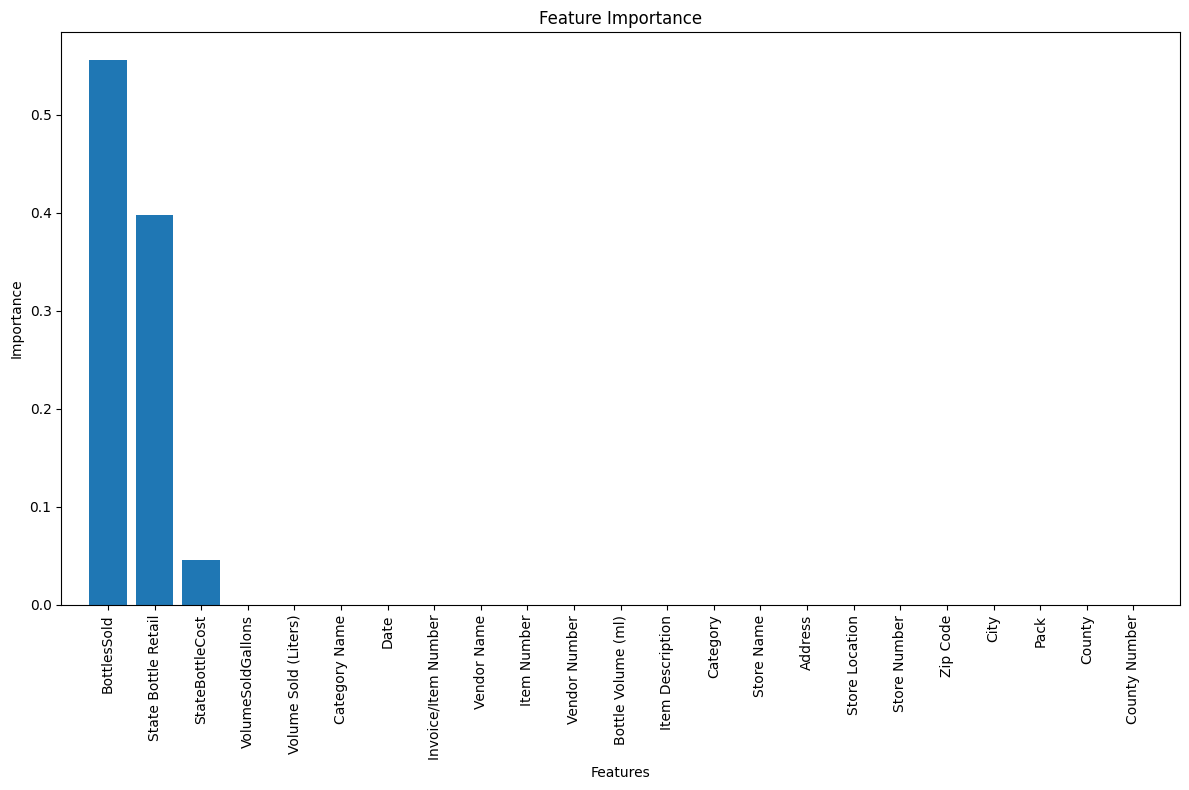

In [ ]:
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

**We can see that the number of bottles sold, state bottle retail price and cost price have the highest influence on the salesamount.**

# **5.2 Kmeans analysis to identify popular product types**

## **Identify the cluster number**

Then, K-Means Cluster is implemented to classify the alcohol products to see the sales pattern of the different categories. Based on the random forest result, ‘State Bottle Cost’, 'State Bottle Retail',and‘Volume Sold (Gallons)’ are selected for this K-means model as they are key representatives of the popularity and consumption levels of the alcoholic products.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Selecting relevant columns
data_scaled = dfstand[['State Bottle Retail', 'Volume Sold (Liters)','StateBottleCost']]

In [ ]:
#| echo: true
#| code-fold: true
# Determine the appropriate number of clusters K using the elbow method
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

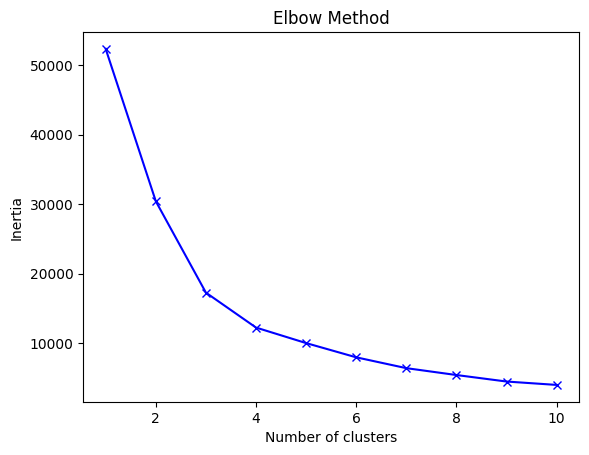

In [ ]:
# Plotting the Elbow Method graph
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Based on the result from the elbow method, k=3 is chosen for this analysis to ensure a balance between the models complexity and the clarity of the categorization.

## **Visualization**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


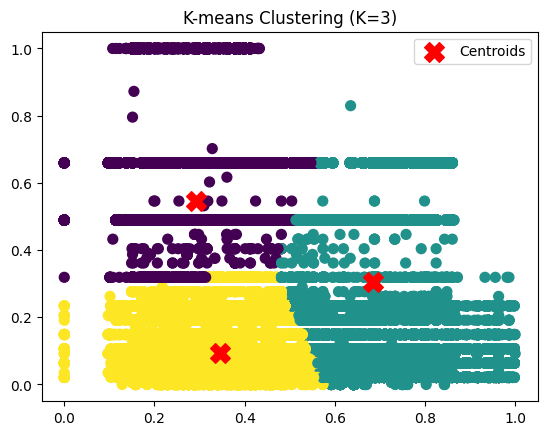

In [ ]:
# Assuming k is chosen as 3 for this example
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)

# Adding cluster labels to your original dataframe
df_cleaned['cluster'] = kmeans.labels_
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Scatter plot of data points with color-coded clusters
plt.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], c=labels, cmap='viridis', s=50)

# Mark cluster centers with 'X' markers
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title(f'K-means Clustering (K={3})')
plt.legend()
plt.show()

### **Comparison of Clusters**

In [ ]:
#| echo: true
#| code-fold: true
# Group by cluster and see mean values
clustered_data = df_cleaned.groupby('cluster').mean()
clustered_data.drop(['County Number', 'Vendor Number', 'Category','Item Number','Year'], axis=1, inplace=True)

<ipython-input-69-c474bee1849e>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clustered_data = df_cleaned.groupby('cluster').mean()


In [ ]:
clustered_data

,Pack,Bottle Volume (ml),State Bottle Retail,Volume Sold (Liters),Salesamount,BottlesSold,StateBottleCost,VolumeSoldGallons,Categorytype
cluster,,,,,,,,,
0,12.00,801.57,9.58,10.02,119.53,12.56,6.37,2.65,3.85
1,12.00,783.39,22.38,5.77,157.92,7.20,14.90,1.53,4.20
2,12.00,684.27,11.32,2.02,36.21,3.20,7.53,0.53,3.93


### **Total sales for each cluster across 2012-2016**

In [ ]:
clustersum = df_cleaned.groupby('cluster')['Salesamount'].sum()
clustersum

cluster
0   21062764.82
1   12571780.86
2    5805160.62
Name: Salesamount, dtype: float64

After performing the algorithm, the dataset is categorized into three distinct clusters. These clusters were analyzed based on the average value of several key variables: SalesAmount, Bottles Sold, State Bottle Retail, and Volume Sold (Gallons) , and the city averages. Consequently, descriptive labels were assigned to each cluster: Popular Bottles, Less Popular Bottles, and High End. The High End cluster,cluster1, is characterized by ‘State Bottle Cost’ value, which notably exceeds the average of $8.45. This higher cost is indicative of its premium positioning. Meanwhile, Cluster0, the most popular Bottles, demonstrates significantly higher metrics across SalesAmount, Bottles Sold, and Volume Sold categories when compared to the average city levels. The remaining cluster,cluster2, Less Popular Bottles, encompasses products that do not align with the high sales figures of the Popular Bottles or the premium pricing of the High End cluster.

---



# **6.Geospatial analysis**

The author conducts a geospatial analysis of demographic trends and liquor store distribution within various areas of Des Moines city at the block level. This examination aims to pinpoint the area with the highest potential for successfully establishing a new liquor store. After obtaining and cleaning data from the US census website by python, the author rates each block based on its median household income and the ratio of the population over 21, visualizing it in ArcGIS. As shown in the image, the blocks colored in yellow and green are rated higher.

# **6.1 Data cleaning and review**

In [ ]:
#Import packages
!pip install geojson
!pip install geodatasets
!pip install mapclassify
!pip install requests
import geojson as gpd
import geopandas as gp
import geodatasets
from geodatasets import get_path
import json
import requests
import mapclassify

## **Import data**

The author employs the 'tidycensus' function in R to retrieve census data for Polk County, encompassing both total population and age distribution at the block level. Subsequently, ArcGIS is utilized to clip the shapefile to the Des Moines boundary. Lastly, GIS tools are applied to compute the percentage of the population over 21.

In [ ]:
#Read data
Polkcounty = gp.read_file('/content/drive/MyDrive/MSSP6070/Assignments/A4/CensusData2.shp')

In [ ]:
Polkcounty
print(Polkcounty.columns)

Index(['STATEFP', 'COUNTYF', 'TRACTCE', 'BLKGRPC', 'GEOID', 'NAMELSA', 'MTFCC',
       'FUNCSTA', 'ALAND', 'AWATER', 'INTPTLA', 'INTPTLO', 'NAME', 'B19013_',
       'B01001_007', 'B01001_008', 'B01001_009', 'B01001_010', 'B01001_011',
       'B01001_012', 'B01001_013', 'B01001_014', 'B01001_015', 'B01001_016',
       'B01001_017', 'POPULAT', 'p_POPUL', 'Mdnhshl', 'geometry'],
      dtype='object')


## **Calculate the population age index**

In [ ]:
# Function to apply
def categorize_value(value):
    if value > 0.379353:
        return 4
    elif value > 0.311703:
        return 3
    elif value > 0.252007:
        return 2
    elif value > 0.144646:
        return 1  # You can assign a different value for values below 1.5 if needed
    else:
        return 0

# Apply the function to create a new column
Polkcounty['populationindex'] = Polkcounty['p_POPUL'].apply(categorize_value)

## **Calculate the income index**

In [ ]:
# Function to apply
def categorize_income(income):
    if income > 88482:
        return 4
    elif income > 60417:
        return 3
    elif income > 42700:
        return 2
    elif income > 24485:
        return 1  # You can assign a different value for values below 1.5 if needed
    else:
        return 0

# Apply the function to create a new column
Polkcounty['incomeindex'] = Polkcounty['Mdnhshl'].apply(categorize_income)

## **Calculate the demographic index with the sum of the income and population age index**

In [ ]:
#Get the sum of the other two indexs
Polkcounty['demographicindex'] = Polkcounty['incomeindex'] + Polkcounty['populationindex']

## **Write the new shp file for GIS analysis**

In [ ]:
Polkcounty.to_file("/content/drive/MyDrive/MSSP6070/Assignments/A4/desmainincome.shp")

<ipython-input-75-54e50c6faadf>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Polkcounty.to_file("/content/drive/MyDrive/MSSP6070/Assignments/A4/desmainincome.shp")


## **Extract the shop coordinates**

In [ ]:
shoplocation = df_cleaned[['Store Location', 'Salesamount', 'Store Name','cluster','Store Number']]

In [ ]:
import re
# Define a regular expression pattern to extract latitude and longitude
pattern = r'\(([\d.-]+),\s+([\d.-]+)\)'

# Use str.extract() to create new 'Latitude' and 'Longitude' columns
shoplocation[['Longitude', 'Latitude']] = shoplocation['Store Location'].str.extract(pattern)

# Convert the columns to numeric
shoplocation['Longitude'] = pd.to_numeric(shoplocation['Longitude'])
shoplocation['Latitude'] = pd.to_numeric(shoplocation['Latitude'])

<ipython-input-75-39c934a9440b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shoplocation[['Longitude', 'Latitude']] = shoplocation['Store Location'].str.extract(pattern)
<ipython-input-75-39c934a9440b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shoplocation[['Longitude', 'Latitude']] = shoplocation['Store Location'].str.extract(pattern)
<ipython-input-75-39c934a9440b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
# Assuming you have a DataFrame named shoplocation
shoplocationsum1 = shoplocation.groupby(['Store Number', 'Store Name', 'Latitude', 'Longitude'])['Salesamount'].sum().reset_index()

In [ ]:
#Write the file
shoplocationsum1.to_csv(r"/content/drive/MyDrive/MSSP6070/Assignments/A4/shoplocationsum1.csv", index=False)

# **6.2 Geospatial data visualization**

In this section, the author will use geopanda to visualize the shop location in Des Moine. However, the geospatial visualization is mainly done in ArcGIS.

In [ ]:
from shapely.geometry import Point

In [ ]:
desmainetrimed = gp.read_file('/content/drive/MyDrive/MSSP6070/Assignments/A4/desmoine.geojson')

In [ ]:
desmainetrimed

,OBJECTID,STATEFP,COUNTYF,TRACTCE,BLKGRPC,...,population,demographi,Shape_Length,Shape_Area,geometry
0,1,19,153,000704,1,...,1,4,0.04,0.00,"POLYGON ((-93.66595 41.64011, -93.66599 41.640..."
1,2,19,153,004300,4,...,2,4,0.03,0.00,"POLYGON ((-93.61612 41.55541, -93.61611 41.557..."
2,3,19,153,004603,2,...,4,6,0.04,0.00,"POLYGON ((-93.62574 41.53555, -93.62830 41.535..."
3,4,19,153,004701,4,...,2,4,0.03,0.00,"POLYGON ((-93.62565 41.52119, -93.62650 41.521..."
4,5,19,153,001500,1,...,2,4,0.03,0.00,"POLYGON ((-93.60056 41.61499, -93.60055 41.616..."
...,...,...,...,...,...,...,...,...,...,...,...
191,192,19,153,004001,1,...,1,2,0.05,0.00,"POLYGON ((-93.64489 41.56856, -93.64504 41.568..."
192,193,19,153,000803,4,...,2,4,0.03,0.00,"POLYGON ((-93.68765 41.62223, -93.68770 41.625..."
193,194,19,153,002700,3,...,4,5,0.03,0.00,"POLYGON ((-93.63774 41.59167, -93.63894 41.591..."
194,195,19,153,004603,4,...,1,3,0.03,0.00,"POLYGON ((-93.63532 41.52653, -93.63533 41.526..."


### **Visualize the shop location based on the coordinates**

In [ ]:
#| echo: true
#| code-fold: true
# Create a GeoDataFrame from the DataFrame
geometry = [Point(xy) for xy in zip(shoplocationsum1['Latitude'], shoplocationsum1['Longitude'])]
gdf = gp.GeoDataFrame(shoplocationsum1, geometry=geometry)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-83-33fc28d2d64e>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  gdf = gp.sjoin(gdf, desmainetrimed, how='inner', op='intersects')


<Axes: >

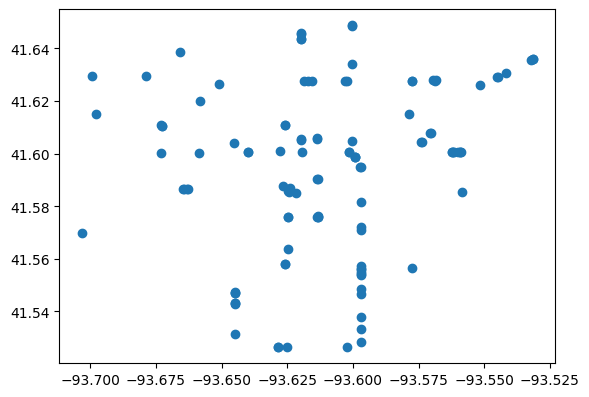

In [ ]:
# Perform a spatial join to retain only the geometries that intersect with the existing GeoJSON
gdf = gp.sjoin(gdf, desmainetrimed, how='inner', op='intersects')
gdf.plot()

## **Add a basemap and visualize shops based on its sales**

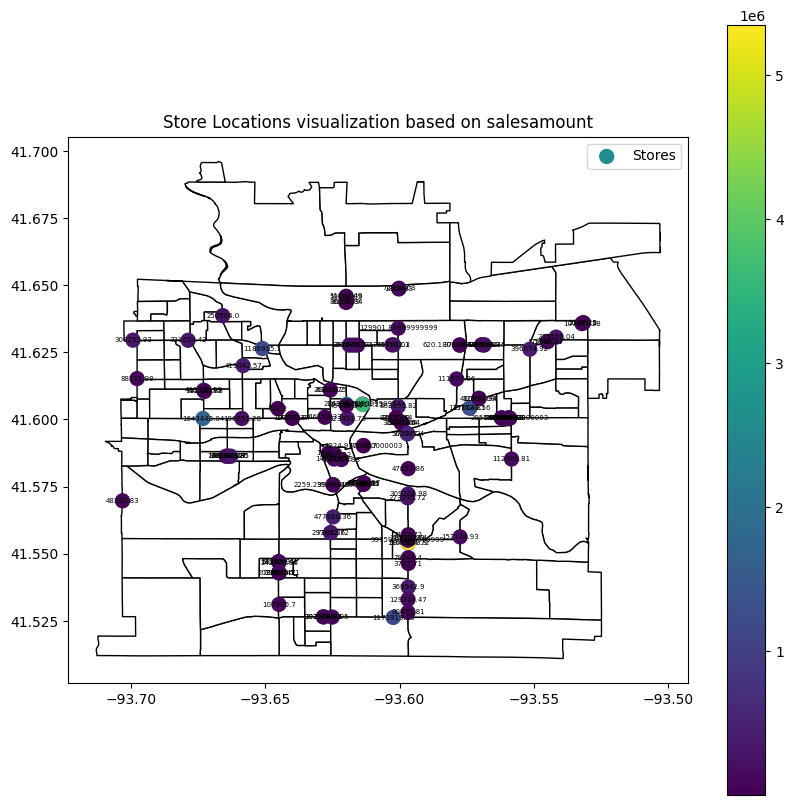

In [ ]:
# Plot the narrowed GeoDataFrame
ax = desmainetrimed.plot(figsize=(10, 10), color='white', edgecolor='black')

# Plot the 'gdf' GeoDataFrame with 'Salesamount' coloring
gdf.plot(ax=ax, column='Salesamount', cmap='viridis', legend=True, markersize=100, label='Stores', marker='o')

# Add labels to the points
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y,gdf['Salesamount']):
    ax.text(x, y, label, fontsize=5, ha='center', va='center')

plt.title('Store Locations visualization based on salesamount')
plt.legend()

The location dot shows that liquor shops are located along the block junctions and street interfaces.This placement is often influenced by factors such as accessibility, visibility, and zoning regulations.We can also see that they are conecentrated along the inner city.

In [ ]:
#| echo: true
#| code-fold: true
import geodatasets
!pip install folium

## **Plot an interacctive page showing the houshold income at block level**



This interface provides a visualization of the income profile of the city at the block level. Blocks with darker colors indicate a lower median household income and lower ratio of popualtion over21, offering a quick and visually intuitive representation of economic disparities across different areas within the city.

In [ ]:
URL1=desmainetrimed.explore(
    column="demographi",  # Similar to plot(); specify the value column
    cmap="viridis",  # What color map do we want to use
    #tiles="CartoDB positron",  # What basemap tiles do we want to use?
)
URL1

After comparing it with the liquor sales location, we can see that liquor atores are concentrated in blocks with relatively lower income level. There is potential to open business in relatively weathlier outskirts area.Also, the potential imported goods may be goods with higher retail price.

---



# **7. Conclusion**

In Des Moines, Iowa, **the most popular liquor products exhibit several characteristics: a state bottle cost averaging around 6.5,a retail price at approximately 9.6 per bottle, and a bottle size of approximately 800 ml.** Notably, **Vodka and Whiskey** emerge as the preferred liquors, boasting higher sales volumes compared to other varieties. Recognized **brands such as Diageo Americas and Jim Beam Brands** also command a significant presence in the market. These insights serve as valuable guidelines for future product selection strategies. Additionally, our analysis underscores the potential for establishing liquor retail establishments in **Block Group 4, Census Tract 30.02, and Block Group 2, Census Tract 9.01**. These blocks stand out due to theirhigher median household income, a greater ratio of population aged 21 and over, and a lower density of existing liquor shops. This favorable combination of factors positions these areas as prime locations for prospective liquor trading businesses.